In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('delhi_air_quality_feature_store_processed.csv')

In [3]:
df.head()

,location_id,city,event_timestamp,temperature,humidity,pressure,wind_speed,wind_direction,pm25,pm10,no2,so2,o3,co,aqi
0,"Delhi Institute of Tool Engineering, Wazirpur,...",Wazirpur,2000-03-15 13:44:28.651396,30.450,74.100,990.425,0.300,21.7,252.0,332.0,62.4,4.8,22.4,35.7,332.0
1,"Satyawati College, Delhi, Delhi, India",Delhi,2000-03-15 13:44:28.651396,26.675,74.350,980.650,1.375,55.3,256.0,234.0,59.2,11.9,2.1,33.8,256.0
2,"ITI Shahdra, Jhilmil Industrial Area, Delhi, D...",Jhilmil,2000-03-15 13:44:28.651396,28.775,62.925,984.350,0.300,221.3,265.0,210.0,48.3,5.1,8.2,35.1,265.0
3,"Sonia Vihar Water Treatment Plant DJB, Delhi, ...",Sonia Vihar,2000-03-15 13:44:28.651396,26.575,78.525,991.300,0.300,313.6,251.0,177.0,16.5,1.8,1.7,24.9,251.0
4,"PGDAV College, Sriniwaspuri, Delhi, Delhi, India",Sriniwaspuri,2000-03-15 13:44:28.651396,22.300,71.425,985.650,0.300,347.1,282.0,347.0,43.1,5.2,3.4,29.9,347.0


In [4]:
df.shape

(2921413, 15)

In [5]:
df.head()

,location_id,city,event_timestamp,temperature,humidity,pressure,wind_speed,wind_direction,pm25,pm10,no2,so2,o3,co,aqi
0,"Delhi Institute of Tool Engineering, Wazirpur,...",Wazirpur,2000-03-15 13:44:28.651396,30.450,74.100,990.425,0.300,21.7,252.0,332.0,62.4,4.8,22.4,35.7,332.0
1,"Satyawati College, Delhi, Delhi, India",Delhi,2000-03-15 13:44:28.651396,26.675,74.350,980.650,1.375,55.3,256.0,234.0,59.2,11.9,2.1,33.8,256.0
2,"ITI Shahdra, Jhilmil Industrial Area, Delhi, D...",Jhilmil,2000-03-15 13:44:28.651396,28.775,62.925,984.350,0.300,221.3,265.0,210.0,48.3,5.1,8.2,35.1,265.0
3,"Sonia Vihar Water Treatment Plant DJB, Delhi, ...",Sonia Vihar,2000-03-15 13:44:28.651396,26.575,78.525,991.300,0.300,313.6,251.0,177.0,16.5,1.8,1.7,24.9,251.0
4,"PGDAV College, Sriniwaspuri, Delhi, Delhi, India",Sriniwaspuri,2000-03-15 13:44:28.651396,22.300,71.425,985.650,0.300,347.1,282.0,347.0,43.1,5.2,3.4,29.9,347.0


In [6]:
df.shape

(2921413, 15)

In [7]:
df = df.reset_index(drop=True)

In [8]:
df = df.drop(columns=['location_id'])

In [9]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], errors='coerce')
df['hour'] = df['event_timestamp'].dt.hour
df['month'] = df['event_timestamp'].dt.month
df['dayofweek'] = df['event_timestamp'].dt.dayofweek

df = df.drop(columns=['event_timestamp'])


In [10]:
df.head()

,city,temperature,humidity,pressure,wind_speed,wind_direction,pm25,pm10,no2,so2,o3,co,aqi,hour,month,dayofweek
0,Wazirpur,30.450,74.100,990.425,0.300,21.7,252.0,332.0,62.4,4.8,22.4,35.7,332.0,13,3,2
1,Delhi,26.675,74.350,980.650,1.375,55.3,256.0,234.0,59.2,11.9,2.1,33.8,256.0,13,3,2
2,Jhilmil,28.775,62.925,984.350,0.300,221.3,265.0,210.0,48.3,5.1,8.2,35.1,265.0,13,3,2
3,Sonia Vihar,26.575,78.525,991.300,0.300,313.6,251.0,177.0,16.5,1.8,1.7,24.9,251.0,13,3,2
4,Sriniwaspuri,22.300,71.425,985.650,0.300,347.1,282.0,347.0,43.1,5.2,3.4,29.9,347.0,13,3,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921413 entries, 0 to 2921412
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   city            object 
 1   temperature     float64
 2   humidity        float64
 3   pressure        float64
 4   wind_speed      float64
 5   wind_direction  float64
 6   pm25            float64
 7   pm10            float64
 8   no2             float64
 9   so2             float64
 10  o3              float64
 11  co              float64
 12  aqi             float64
 13  hour            int32  
 14  month           int32  
 15  dayofweek       int32  
dtypes: float64(12), int32(3), object(1)
memory usage: 323.2+ MB


In [12]:
df.isnull().sum()

city              0
temperature       0
humidity          0
pressure          0
wind_speed        0
wind_direction    0
pm25              0
pm10              0
no2               0
so2               0
o3                0
co                0
aqi               0
hour              0
month             0
dayofweek         0
dtype: int64

In [13]:
#handling the outliers

for col in ['pm25', 'pm10', 'no2', 'so2', 'o3', 'co']:
    df[col] = df[col].clip(lower=0, upper=df[col].quantile(0.99))


In [14]:
df.head()

,city,temperature,humidity,pressure,wind_speed,wind_direction,pm25,pm10,no2,so2,o3,co,aqi,hour,month,dayofweek
0,Wazirpur,30.450,74.100,990.425,0.300,21.7,252.0,332.0,62.4,4.8,22.4,35.7,332.0,13,3,2
1,Delhi,26.675,74.350,980.650,1.375,55.3,256.0,234.0,59.2,11.9,2.1,33.8,256.0,13,3,2
2,Jhilmil,28.775,62.925,984.350,0.300,221.3,265.0,210.0,48.3,5.1,8.2,35.1,265.0,13,3,2
3,Sonia Vihar,26.575,78.525,991.300,0.300,313.6,251.0,177.0,16.5,1.8,1.7,24.9,251.0,13,3,2
4,Sriniwaspuri,22.300,71.425,985.650,0.300,347.1,282.0,347.0,43.1,5.2,3.4,29.9,347.0,13,3,2


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])

In [17]:
df.head()

,city,temperature,humidity,pressure,wind_speed,wind_direction,pm25,pm10,no2,so2,o3,co,aqi,hour,month,dayofweek
0,13,30.450,74.100,990.425,0.300,21.7,252.0,332.0,62.4,4.8,22.4,35.7,332.0,13,3,2
1,1,26.675,74.350,980.650,1.375,55.3,256.0,234.0,59.2,11.9,2.1,33.8,256.0,13,3,2
2,4,28.775,62.925,984.350,0.300,221.3,265.0,210.0,48.3,5.1,8.2,35.1,265.0,13,3,2
3,11,26.575,78.525,991.300,0.300,313.6,251.0,177.0,16.5,1.8,1.7,24.9,251.0,13,3,2
4,12,22.300,71.425,985.650,0.300,347.1,282.0,347.0,43.1,5.2,3.4,29.9,347.0,13,3,2


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(columns=['aqi'])
y = df['aqi']

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
X_train , X_test ,y_train , y_test = train_test_split(X,y ,
                                                     test_size=0.2,
                                                     random_state=42)

In [22]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

In [25]:
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) 

C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='mse' , optimizer='Adam' , metrics=['mae'])

In [28]:
history = model.fit(X_train , y_train , epochs=10 , validation_split=0.2)

Epoch 1/10
58429/58429 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - loss: 2683.4470 - mae: 19.1825 - val_loss: 101.0032 - val_mae: 5.1016
Epoch 2/10
58429/58429 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - loss: 100.9772 - mae: 5.2643 - val_loss: 94.6311 - val_mae: 5.0203
Epoch 3/10
58429/58429 ━━━━━━━━━━━━━━━━━━━━ 540s 9ms/step - loss: 92.3767 - mae: 5.1894 - val_loss: 86.1175 - val_mae: 4.9189
Epoch 4/10
58429/58429 ━━━━━━━━━━━━━━━━━━━━ 95s 2ms/step - loss: 86.6040 - mae: 5.0984 - val_loss: 69.8443 - val_mae: 4.5491
Epoch 5/10
58429/58429 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - loss: 69.3816 - mae: 4.7821 - val_loss: 57.2576 - val_mae: 4.7290
Epoch 6/10
58429/58429 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - loss: 51.1799 - mae: 4.3045 - val_loss: 27.0724 - val_mae: 2.9306
Epoch 7/10
58429/58429 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - loss: 25.3971 - mae: 3.0394 - val_loss: 16.3706 - val_mae: 2.3716
Epoch 8/10
58429/58429 ━━━━━━━━━━━━━━━━━━━━ 100s 2ms/step - loss: 16.5733 - mae: 2.5233 - val_loss: 12.9153 - val_mae: 

In [29]:
y_pred = model.predict(X_test)

18259/18259 ━━━━━━━━━━━━━━━━━━━━ 14s 744us/step


In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test,y_pred)

0.9995854467188025

In [32]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [33]:
mean_absolute_error(y_test,y_pred)

1.6850433101774152

In [34]:
root_mean_squared_error(y_test,y_pred)

2.6092708247771594

In [35]:
import matplotlib.pyplot as plt

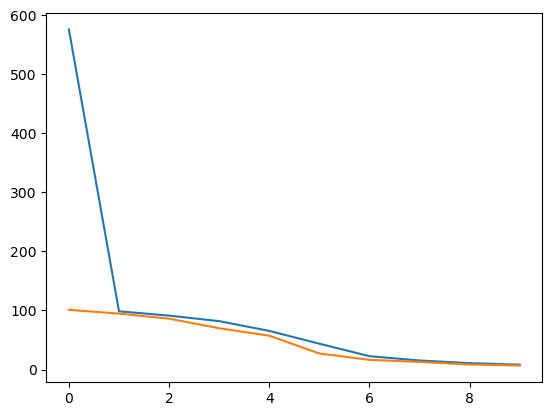

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

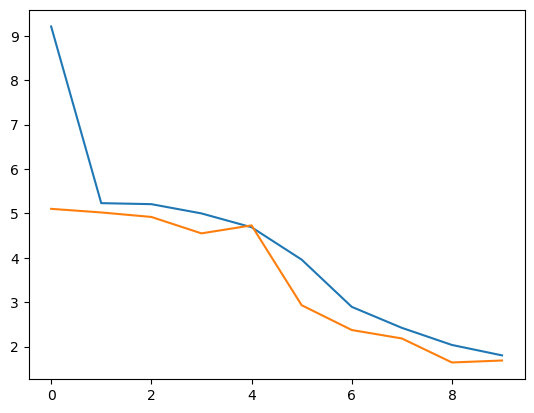

In [38]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

In [39]:
model.save("aqi_prediction_model_v1.h5")
